# Problem1

In [42]:
from sklearn.model_selection import train_test_split
X_titanic_df=titanic_df.drop('Survived',axis=1)
y_titanic_df=titanic_df['Survived']
x_train, x_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.3, random_state=11)
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)


(621, 10) (267, 10) (621,) (267,)


C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Problem2

In [48]:
def function1(y_test, pred):
    accu=accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred)
    rec=recall_score(y_test, pred)
    roc=roc_auc_score(y_test, pred)
    f1=f1_score(y_test, pred)
    print('정확도:{0:4f},정밀도:{1:.4f},재현율:{2:.4f},f1_score:{3:4f},roc_auc_score:{4:4f}'.format(accu,pre,rec,f1,roc))

    


In [49]:
function1(y_test,pred)

정확도:0.794007,정밀도:0.7742,재현율:0.6792,f1_score:0.723618,roc_auc_score:0.774405


# Problem3

In [89]:
#1. 정밀도 재현율의 곡선
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )


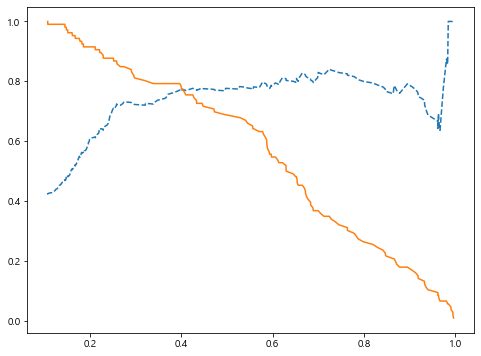

In [90]:


def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])    
#2. roc_auc 곡선 

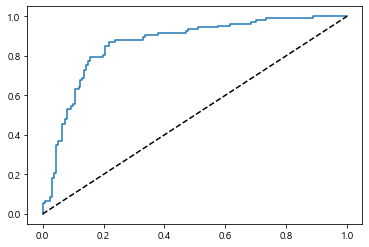

In [92]:
from sklearn.metrics import roc_curve
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
def roc_curve_plot(y_test , pred_proba_c1): 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)
    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
roc_curve_plot(y_test ,  lr_clf.predict_proba(x_test)[:, 1])  

# Problem4

In [72]:
print('오차행렬:','\n',confusion_matrix(pred,y_test))

print('fn:{0:.0f},fp:{1:.0f},tn:{2:.0f},tp:{3:.0f}'.format(confusion_matrix(pred,y_test)[1][0],
                                          confusion_matrix(pred,y_test)[0][1],
                                          confusion_matrix(pred,y_test)[0][0],
                                     confusion_matrix(pred,y_test)[1][1]))


오차행렬: 
 [[140  34]
 [ 21  72]]
fn:21,fp:34,tn:140,tp:72


정밀도:tp/p=tp/(fp+tp)
재현율:tp/true=(fn+tp)


# Problem5

In [73]:
#1
#negative 비율 출력
FN=confusion_matrix(pred,y_test)[1][0]
FP=confusion_matrix(pred,y_test)[0][1]
TN=confusion_matrix(pred,y_test)[0][0]
TP=confusion_matrix(pred,y_test)[1][1]
negative=(TN+FP)/(FN+FP+TN+TP)
print('실제 negative 비율:',negative)
p

실제 negative 비율: 0.651685393258427


In [75]:
#2
pre=precision_score(y_test, pred)
rec=recall_score(y_test, pred)
print('정밀도:',pre,'재현율:',rec)


#재현율 개선 필요 여지o


##->1.정밀도>>재현율
pre=precision_score(y_test, pred)
rec=recall_score(y_test, pred)
print('정밀도:',pre,'재현율:',rec)

##+ 실제 negative값이 높기 때문에

정밀도: 0.7741935483870968 재현율: 0.6792452830188679


In [76]:
#3
thresholds=[0.4,0.45,0.5,0.55,0.6]


In [80]:
#4.
from sklearn.preprocessing import Binarizer
pred_proba = lr_clf.predict_proba(x_test)
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        function1(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
정확도:0.820225,정밀도:0.7685,재현율:0.7830,f1_score:0.775701,roc_auc_score:0.813870
임곗값: 0.45
정확도:0.801498,정밀도:0.7732,재현율:0.7075,f1_score:0.738916,roc_auc_score:0.785451
임곗값: 0.5
정확도:0.794007,정밀도:0.7742,재현율:0.6792,f1_score:0.723618,roc_auc_score:0.774405
임곗값: 0.55
정확도:0.786517,정밀도:0.7753,재현율:0.6509,f1_score:0.707692,roc_auc_score:0.763360
임곗값: 0.6
정확도:0.764045,정밀도:0.7945,재현율:0.5472,f1_score:0.648045,roc_auc_score:0.727001


In [85]:
#5
#최적의 임계값: 0.45로 판단
#높은 f1_score+재현율 상승
thresholds=[0.45]

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )


임곗값: 0.45
정확도:0.801498,정밀도:0.7732,재현율:0.7075,f1_score:0.738916,roc_auc_score:0.785451
